In [1]:
import numpy as np
import seaborn as sns
from sklearn import *
import matplotlib.pyplot as plt

In [14]:

def FisherLDA(X, y):
    target = np.unique(y)

    mean_vectors = []

    for i in target:
        mean_vectors.append(np.mean(X[y == i], axis=0))

    # Between class scatter matrix
    if len(y) == 2: 
        # for two classes
        mu1_mu2 = (mean_vectors[0] - mean_vectors[1]).reshape(1, X.shape[1])
        B = np.dot(mu1_mu2.T, mu1_mu2)
    else:
        # for multiclass
        full_data_mean = np.mean(X, axis=0).reshape(1, X.shape[1])
        B = np.zeros((X.shape[1], X.shape[1]))
        for i, mean_vec in enumerate(mean_vectors):
            n = X[y == i].shape[0]
            mean_vec = mean_vec.reshape(1, X.shape[1])
            mu1_mu2 = mean_vec - full_data_mean

            B += n * np.dot(mu1_mu2.T, mu1_mu2)

    s_matrix = []
     # within class scatter matrix
    for j, mean in enumerate(mean_vectors):
        Si = np.zeros((X.shape[1], X.shape[1]))
        for row in X[y == j]:
            t = (row - mean).reshape(1, X.shape[1])
            Si += np.dot(t.T, t)
        s_matrix.append(Si)    

    W = np.zeros((X.shape[1], X.shape[1]))
    for s_i in s_matrix:
        W += s_i

    W_inv = np.linalg.inv(W)
    W_inv_B = W_inv.dot(B)

    eig_vals, eig_vecs = np.linalg.eig(W_inv_B)

    idx = eig_vals.argsort()[::-1]
    eig_vecs = eig_vecs[:, idx]

    return eig_vecs
        

In [15]:
def load_data(cols, load_all=False, head=False):
    iris = sns.load_dataset("iris")
 
    if not load_all:
        if head:
            iris = iris.head(100)
        else:
            iris = iris.tail(100)
 
    le = preprocessing.LabelEncoder()
    y = le.fit_transform(iris["species"])
 
    X = iris.drop(["species"], axis=1)
 
    if len(cols) > 0:
        X = X[cols]
 
    return X.values, y


(150, 2)


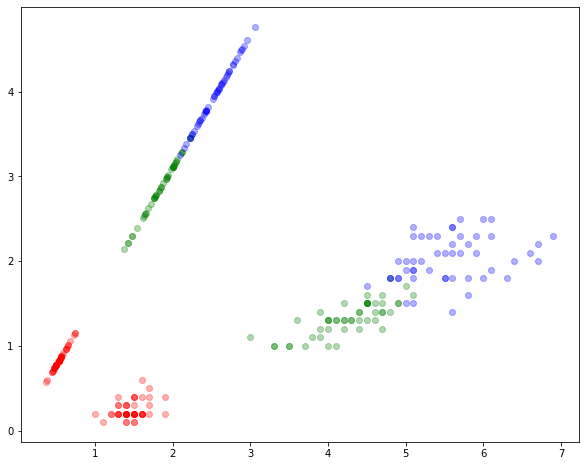

In [16]:
cols = ["petal_length", "petal_width"]
X, y = load_data(cols, load_all=True, head=True)
print(X.shape)

W = FisherLDA(X, y)
W = W[:, :1]

colors = ['red', 'green', 'blue']
fig, ax = plt.subplots(figsize=(10, 8))
for point, pred in zip(X, y):
    ax.scatter(point[0], point[1], color=colors[pred], alpha=0.3)
    proj = (np.dot(point, W) * W) / np.dot(W.T, W)
 
    ax.scatter(proj[0], proj[1], color=colors[pred], alpha=0.3)
 
plt.show()